In [1]:
# Any copyright is dedicated to the Public Domain.
# https://creativecommons.org/publicdomain/zero/1.0/

# Joseph Catanzarite
#     Adapted from code originally written by Francois Fleuret <francois@fleuret.org>

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os, time
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib.request

import requests
import pandas as pd
import io
import datetime
from parse import *
import re
from dateutil.rrule import rrule, DAILY

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Get the JHU timeseries data for confirmed cases, deaths and recoveries

In [3]:
# url1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
# url2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
# url3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

url1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'


# url_dict = {url1:'Confirmed',url2:'Deaths',url3:'Recovered'}
url_dict = {url1:'Confirmed',url2:'Deaths'}


In [4]:
cf = requests.get(url1).content
df_con = pd.read_csv(io.StringIO(cf.decode('utf-8')))
df_con.name = 'Confirmed'

dd = requests.get(url2).content
df_die = pd.read_csv(io.StringIO(dd.decode('utf-8')))
df_die.name = 'Deaths'

#rc = requests.get(url3).content
#df_rec = pd.read_csv(io.StringIO(rc.decode('utf-8')))
#df_rec.name = 'Recovered'

## Table of fractional increase in today's confirmed cases ves. yesterday's

#### helper function to extract time serise of dates

In [5]:
def get_dates(df):
    date_cols = df.columns.to_list()
    non_dates = ['Province/State', 'Country/Region', 'Lat', 'Long']
    for item in non_dates:
        date_cols.remove(item)
    return date_cols


#### table sorted by # of confirmed cases

In [6]:
# fractional increase of today's over yesterday's confirmed counts, sorted
date_cols = get_dates(df_con)
dg_con = df_con.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
dg_con['%increase'] = 100*(dg_con[date_cols[-1]]-dg_con[date_cols[-2]])/dg_con[date_cols[-2]]
dg_con[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values(date_cols[-1],ascending = False)

,3/22/20,3/23/20,%increase
Country/Region,,,
China,81435,81498,0.077362
Italy,59138,63927,8.098008
US,33276,43847,31.767640
Spain,28768,35136,22.135706
Germany,24873,29056,16.817433
Iran,21638,23049,6.520935
France,16243,20123,23.887213
"Korea, South",8961,8961,0.000000
Switzerland,7474,8795,17.674605


#### table sorted by %increase in confirmed cases over previous day

In [7]:
dg_con[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values('%increase',ascending = False)

,3/22/20,3/23/20,%increase
Country/Region,,,
Uganda,1,9,800.000000
Madagascar,3,12,300.000000
Antigua and Barbuda,1,3,200.000000
Haiti,2,6,200.000000
Djibouti,1,3,200.000000
Benin,2,5,150.000000
Dominica,1,2,100.000000
Guinea,2,4,100.000000
Nepal,1,2,100.000000


#### fractional increase of today's over yesterday's deaths, sorted

In [9]:
date_cols = get_dates(df_die)
dg_die = df_die.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
dg_die['%increase'] = 100*(dg_die[date_cols[-1]]-dg_die[date_cols[-2]])/dg_die[date_cols[-2]]
dg_die[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values(date_cols[-1],ascending = False)

,3/22/20,3/23/20,%increase
Country/Region,,,
Italy,5476,6077,10.975164
China,3274,3274,0.000000
Spain,1772,2311,30.417607
Iran,1685,1812,7.537092
France,676,862,27.514793
US,417,557,33.573141
United Kingdom,282,336,19.148936
Netherlands,180,214,18.888889
Germany,94,123,30.851064


## Time series plot helper function

In [10]:
def plot_timeseries(df):
    
    #df.sort_values(by=df.columns[-1],ascending=False, inplace = True)
    
    
    date_cols = df.columns.to_list()
    non_dates = ['Province/State', 'Country/Region', 'Lat', 'Long']
    for item in non_dates:
        date_cols.remove(item)

    dg = df.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
    
    times = [datetime.datetime.strptime(col,'%m/%d/%y') for col in dg.columns]

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.xaxis_date()

    ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.25)
    ax.set_title('Cumulative number of COVID-19 cases: ' + df.name)
    ax.set_xlabel('Date', labelpad = 10)
    ax.set_ylabel('Counts', labelpad = 10)
    ax.set_yscale('log')

    myFmt = mdates.DateFormatter('%b %d')

    ax.xaxis.set_major_formatter(myFmt)
    #dates = mdates.epoch2num(times)

    #dates = mdates.date2num(times)
    dates=times
    #dates = list(rrule(freq=DAILY, dtstart=times[0]))
    
    # matplotlib list of named colors
    ## https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    
    for key, color, label in [
            ('Germany', 'blue', 'Germany'),
            ('Spain', 'red', 'Spain'),
            ('France', 'lightgreen', 'France'),
            ('US', 'black', 'USA'),
            ('Korea, South', 'gray', 'South Korea'),
            ('Italy', 'purple', 'Italy'),
            ('China', 'orange', 'China'),
            ('Iran', 'cyan', 'Iran'),
            ('Switzerland', 'magenta', 'Switzerland'),
            ('Norway', 'salmon', 'Norway'),
            ('United Kingdom', 'cornflowerblue', 'United Kingdom'),
            ('Netherlands', 'maroon', 'Netherlands'),
            ('Sweden', 'turquoise', 'Sweden'),
        

    ]:
        ax.plot(dates, dg.loc()[key], color = color, label = label, linewidth=2)

    ax.legend(frameon = True)
    plt.xticks(rotation=75)
    plt.show()
    

    last_date = date_cols[-1].replace('/', '-',2) 
    png_name = 'COVID-19-'+df.name+last_date+'.png'

    #fig.savefig('covid19_confirmed.png')
    fig.savefig(png_name)


## Plot  `Confirmed`, `Deaths`, and `Recoveries`  timeseries

Confirmed


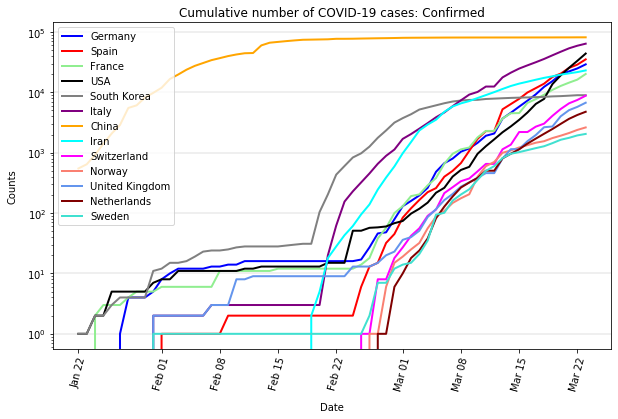

Deaths


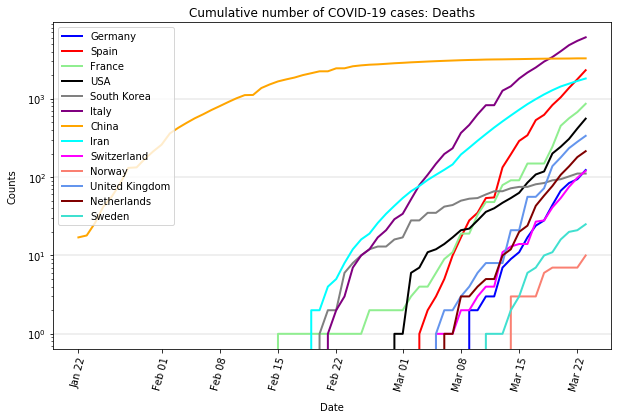

In [11]:
# for df in [df_con, df_die, df_rec]:
for df in [df_con, df_die]:
    print(df.name)
    plot_timeseries(df)